# **Assignment Overview**

This project focuses on leveraging deep learning techniques to classify partial fingerprints. The goal is to train a neural network on original and distorted images such that the network can accurately determine the gender associated with a partial fingerprint.


# **DATA**

The NIST special database 302 contains 22,150 fingerprint images covering 2215 individuals. The database contains the images for each of the individuals 10 fingers (i.e. combination of right and left hand).

The fingerprint images arrive in four separate directories: Original, Partial_L1, Partial_L2, and Partial_L3. The originals contain untouched fingerprints from both males and females. The partials contain blurred and partial fingerprints, with a higher level meaning more distortion in the images.

The dataset can be located here:
https://www.nist.gov/itl/iad/image-group/nist-special-database-302


## Download Images

In [26]:
! git clone https://github.com/nashebismaily/deep-learning-fingerprints.git /tmp/fingerprints

Cloning into '/tmp/fingerprints1'...
remote: Enumerating objects: 22160, done.
remote: Total 22160 (delta 0), reused 0 (delta 0), pack-reused 22160
Receiving objects: 100% (22160/22160), 157.00 MiB | 30.60 MiB/s, done.
Resolving deltas: 100% (1403/1403), done.
Checking out files: 100% (22148/22148), done.


## Helper Functions



In [1]:
# This function will create a label from the name of the file. 
# This label will include: Gender, Finger, and Hand (Left or Right)

def extract_label(img_path, partial=True):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    subject_id, etc = filename.split('__')
    if partial:
        gender, lr, finger, _, _ = etc.split('_')
    else:
        gender, lr, finger, _ = etc.split('_')
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr == 'Left' else 1
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
    return np.array([gender], dtype=np.uint16)

In [2]:
import os
import cv2
import numpy as np

# This function will load the image from the specified path using opencv
# The image will be converted to greyscale using cv2.IMREAD_GRAYSCALE
# The function will call extract_label for each image and append the parsed label

def loading_data(path,partial):
    print("loading data from: ",path)
    data = []
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
            img_resize = cv2.resize(img_array, (96, 96))
            label = extract_label(os.path.join(path, img), partial)
            data.append([label[0], img_resize ])
        except Exception as e:
          print(e)
          pass
    return data


## Load the Image Data

In [3]:
# Load undistorted fingerprint images
original_M_path = "/tmp/fingerprints/images/Original/M"
original_F_path = "/tmp/fingerprints/images/Original/F"
original_data_M = loading_data(original_M_path, partial = False)
original_data_F = loading_data(original_M_path, partial = False)
original_data = np.concatenate([original_data_M, original_data_F], axis=0)

# Load L1 distorted fingerprint images
partial_L1_M_path = "/tmp/fingerprints/images/PartialL1/M"
partial_L1_F_path = "/tmp/fingerprints/images/PartialL1/F"
partial_L1_data_M = loading_data(partial_L1_M_path, partial = True)
partial_L1_data_F = loading_data(partial_L1_F_path, partial = True)
partial_L1_data = np.concatenate([partial_L1_data_M, partial_L1_data_F], axis=0)

# Load L2 distorted fingerprint images
partial_L2_M_path = "/tmp/fingerprints/images/PartialL2/M"
partial_L2_F_path = "/tmp/fingerprints/images/PartialL2/F"
partial_L2_data_M = loading_data(partial_L2_M_path, partial = True)
partial_L2_data_F = loading_data(partial_L2_F_path, partial = True)
partial_L2_data = np.concatenate([partial_L2_data_M, partial_L2_data_F], axis=0)

# Load L3 distorted fingerprint images
partial_L3_M_path = "/tmp/fingerprints/images/PartialL3/M"
partial_L3_F_path = "/tmp/fingerprints/images/PartialL3/F"
partial_L3_data_M = loading_data(partial_L3_M_path, partial = True)
partial_L3_data_F = loading_data(partial_L3_F_path, partial = True)
partial_L3_data = np.concatenate([partial_L3_data_M, partial_L3_data_F], axis=0)

# Concatenate images
full_data = np.concatenate([original_data, partial_L1_data, partial_L2_data, partial_L3_data], axis=0)

loading data from:  /tmp/fingerprints/images/Original/M
loading data from:  /tmp/fingerprints/images/Original/M
loading data from:  /tmp/fingerprints/images/PartialL1/M
loading data from:  /tmp/fingerprints/images/PartialL1/F
loading data from:  /tmp/fingerprints/images/PartialL2/M
loading data from:  /tmp/fingerprints/images/PartialL2/F
loading data from:  /tmp/fingerprints/images/PartialL3/M
loading data from:  /tmp/fingerprints/images/PartialL3/F


## Observe Data

In [4]:
# Observe Dimensionality of Dataset

print("Total images in Original dataset: {}".format(len(original_data)))
print("Total images in Partial L1 dataset: {}".format(len(partial_L1_data)))
print("Total images in Partial L2 dataset: {}".format(len(partial_L2_data)))
print("Total images in Partial L3 dataset: {}".format(len(partial_L3_data)))

Total images in Original dataset: 2460
Total images in Partial L1 dataset: 7337
Total images in Partial L2 dataset: 6857
Total images in Partial L3 dataset: 5494


In [5]:
# Observe that the distribution of Males and Females in the full training dataset is relativley the same.

total_M = len(original_data_M) + len(partial_L1_data_M) + len(partial_L2_data_M) +len(partial_L3_data_M)
total_F = len(original_data_F) + len(partial_L1_data_F) + len(partial_L2_data_F) +len(partial_L3_data_F)

total_M_F = total_M + total_F

print("Total M in dataset: {}".format(total_M))
print("Total F in dataset: {}".format(total_F))

print("\nPercent of M in dataset: {}".format(total_M/total_M_F))
print("Percent of F in dataset: {}".format(total_F/total_M_F))

Total M in dataset: 11081
Total F in dataset: 11067

Percent of M in dataset: 0.5003160556257902
Percent of F in dataset: 0.4996839443742099


Notice that, in this particular data set, the distribution of Males and Females is relativley the same (0.5003 and 0.4997 respectivley)

## View the Images

Original Data:


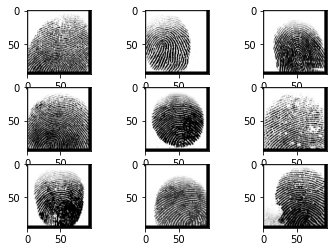

Partial L1 Data:


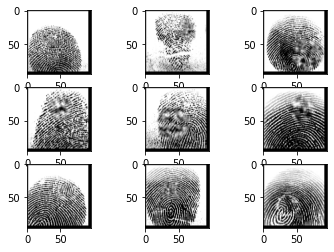

Partial L2 Data:


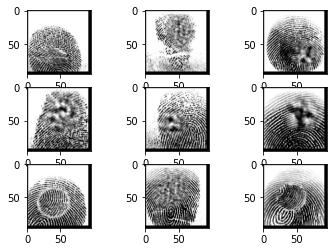

Partial L3 Data:


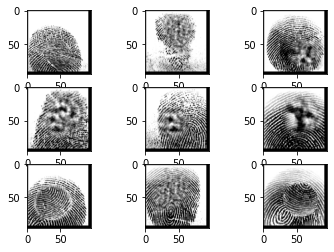

In [6]:
import matplotlib.pyplot as plt
import cv2

print("Original Data:")
count = 0
for label, image in original_data:
  if count < 9:
    plt.subplot(3, 3, + 1 + count)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
  else:
    break
  count +=1
plt.show()

print("Partial L1 Data:")
count = 0
for label, image in partial_L1_data:
  if count < 9:
    plt.subplot(3, 3, + 1 + count)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
  else:
    break
  count +=1
plt.show()

print("Partial L2 Data:")
count = 0
for label, image in partial_L2_data:
  if count < 9:
    plt.subplot(3, 3, + 1 + count)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
  else:
    break
  count +=1
plt.show()

print("Partial L3 Data:")
count = 0
for label, image in partial_L3_data:
  if count < 9:
    plt.subplot(3, 3, + 1 + count)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
  else:
    break
  count +=1
plt.show()

Notice how the distortion of the fingerprints increase as the partial level associated with the images increase.

## Test and Train Split

Shuffle the data and split into train (70%) and test (30%) for each of the levels. This is done on a per level basis so that we can better understand the performance of the neural network on each distortion level.

---



In [10]:
import random

random.seed(123)
random.shuffle(original_data)
random.shuffle(partial_L1_data)
random.shuffle(partial_L2_data)
random.shuffle(partial_L3_data)

train_original = original_data[:1722]
train_partial_l1 = partial_L1_data[:5135]
train_partial_l2 = partial_L2_data[:4799]
train_partial_l3 = partial_L3_data[:3845]
train = np.concatenate([train_original, train_partial_l1, train_partial_l2, train_partial_l3], axis=0)

test_original = original_data[1722:]
test_partial_l1 = partial_L1_data[5135:]
test_partial_l2 = partial_L2_data[4799:]
test_partial_l3 = partial_L3_data[3845:]
test = np.concatenate([test_original, test_partial_l1, test_partial_l2, test_partial_l3], axis=0)


Extract the label and images from the train test lists and normalize the data.

In [31]:
# Train data
train_img, train_labels, train_data = [], [], [] 
for label, image in train:
  train_labels.append(label)
  train_img.append(image)
train_data = np.array(train_img).reshape(-1, 96, 96, 1)
train_data = train_data / 255.0

# Test data
test_img, test_labels, test_data = [], [], []
for label, image in test:
  test_labels.append(label)
  test_img.append(image)
test_data = np.array(test_img).reshape(-1, 96, 96, 1)
test_data = test_data / 255.0


Encode Labels for Test and Train

In [33]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels, num_classes = 2)
test_labels = to_categorical(test_labels, num_classes = 2)

Verify dimensionality

In [13]:
print("Train data size: {}".format(len(train_data)))
print("Train labels size: {}".format(len(train_labels)))

print("\nTest data size: {}".format(len(test_data)))
print("Test labels size: {}".format(len(test_labels)))


Train data size: 15501
Train labels size: 15501

Test data size: 6647
Test labels size: 6647


## Create Neural Network

This neural network contains 2 Convolutional layers (with 32 neurons and a filter of 3, each followed by a batch normalization and a max pooling layer (which merges / reduces size of data). Afterwards, we add a flattening layer which converts the input into a 1-D array. The flattened layer is connected to our fully-connected-layers which enable the classification of Males and Females. The first fully connected dense layer uses he_uniform as the variance scaling initializer. The final fully connected layer has 2 neurons for classification (i.e M and F) and uses a sigmoid activation which is a two-class logistic regression function.


In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import backend, models, layers, regularizers

backend.clear_session()

model = models.Sequential()
model.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_uniform', input_shape = [96, 96, 1]))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Conv2D(32, 3, padding='same', kernel_initializer='he_uniform', activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(128, kernel_initializer='he_uniform',activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0

## Compile Model and Fit to Training Data

**Note:**  The validation data set is automatically created by specifying the  validation_split parameter in the compile function.


In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer = Adam(learning_rate=0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

history = model.fit(
    train_data,
    train_labels,
    steps_per_epoch=128,
    epochs=15,
    validation_split = 0.25, # This will automaticaly split 25% of the data into validation
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights = True)]) # Here I want to monitor the loss

Epoch 1/15
128/128 [==============================] - 3s 27ms/step - loss: 0.0759 - accuracy: 0.9882 - val_loss: 0.1178 - val_accuracy: 0.9946
Epoch 2/15
128/128 [==============================] - 3s 26ms/step - loss: 0.0281 - accuracy: 0.9949 - val_loss: 0.1041 - val_accuracy: 0.9946
Epoch 3/15
128/128 [==============================] - 3s 26ms/step - loss: 0.0141 - accuracy: 0.9949 - val_loss: 0.0459 - val_accuracy: 0.9943
Epoch 4/15
128/128 [==============================] - 3s 26ms/step - loss: 0.0073 - accuracy: 0.9949 - val_loss: 0.0302 - val_accuracy: 0.9943
Epoch 5/15
128/128 [==============================] - 3s 26ms/step - loss: 0.0054 - accuracy: 0.9949 - val_loss: 0.0296 - val_accuracy: 0.9943
Epoch 6/15
128/128 [==============================] - 3s 26ms/step - loss: 0.0047 - accuracy: 0.9949 - val_loss: 0.0362 - val_accuracy: 0.9943
Epoch 7/15
128/128 [==============================] - 3s 26ms/step - loss: 0.0043 - accuracy: 0.9949 - val_loss: 0.0314 - val_accuracy: 0.9943

## Plot

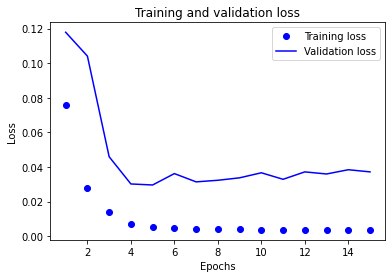

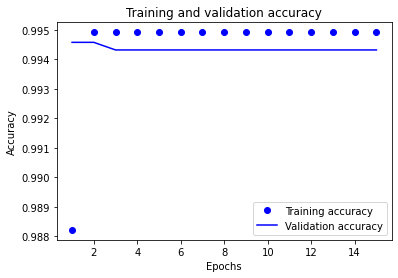

In [29]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The graphs above show that the loss begins to elbow at about 4 epochs. If I were to re-run this, I could reduce my epoch count and therefore decrease the learning time required by this network.

## Test Model on Full Test Dataset

When testing the model on the full dataset (containing original and all partial test data) the accuracy obtained is 90.808%. 



In [34]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('test_acc:', test_acc)

208/208 [==============================] - 1s 4ms/step - loss: 0.5468 - accuracy: 0.9081
test_acc: 0.9080788493156433


## Evaluate Model For Original Dataset

Here, I'm using the model to test the accuracy on the test data subset containing only the non-distorted images. The accuracy of this model is 100%.

In [35]:
test_img, test_labels, test_data = [], [], []
for label, image in test_original:
  test_labels.append(label)
  test_img.append(image)
test_data = np.array(test_img).reshape(-1, 96, 96, 1)
test_data = test_data / 255.0
test_labels = to_categorical(test_labels, num_classes = 2)

test_loss, test_acc = model.evaluate(test_data, test_labels)
print('test_acc:', test_acc)


24/24 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
test_acc: 1.0


## Evaluate Model For Partial L1 Dataset

Here, I'm using the model to test the accuracy on the test data subset containing only the Partial L1 fingerprints. The accuracy of this model is 90.78%. As expected, the L1 distortion accuracy is less than the images with no distortion.

In [36]:
test_img, test_labels, test_data = [], [], []
for label, image in test_partial_l1:
  test_labels.append(label)
  test_img.append(image)
test_data = np.array(test_img).reshape(-1, 96, 96, 1)
test_data = test_data / 255.0
test_labels = to_categorical(test_labels, num_classes = 2)

test_loss, test_acc = model.evaluate(test_data, test_labels)
print('test_acc:', test_acc)


69/69 [==============================] - 0s 5ms/step - loss: 0.5854 - accuracy: 0.9078
test_acc: 0.9078111052513123


## Evaluate Model For Partial L2 Dataset

Here, I'm using the model to test the accuracy on the test data subset containing only the Partial L2 fingerprints. The accuracy of this model is 89.65%. As expected, the L2 distortion accuracy is less than the L1 distortion accuracy.

In [37]:
test_img, test_labels, test_data = [], [], []
for label, image in test_partial_l2:
  test_labels.append(label)
  test_img.append(image)
test_data = np.array(test_img).reshape(-1, 96, 96, 1)
test_data = test_data / 255.0
test_labels = to_categorical(test_labels, num_classes = 2)

test_loss, test_acc = model.evaluate(test_data, test_labels)
print('test_acc:', test_acc)


65/65 [==============================] - 0s 5ms/step - loss: 0.5906 - accuracy: 0.8965
test_acc: 0.8965014815330505


## Evaluate Model For Partial L3 Dataset

Here, I'm using the model to test the accuracy on the test data subset containing only the Partial L3 fingerprints. The accuracy of this model is 88.17%. As expected, the L3 distortion accuracy is less than the L2 distortion accuracy.

In [38]:
test_img, test_labels, test_data = [], [], []
for label, image in test_partial_l3:
  test_labels.append(label)
  test_img.append(image)
test_data = np.array(test_img).reshape(-1, 96, 96, 1)
test_data = test_data / 255.0
test_labels = to_categorical(test_labels, num_classes = 2)

test_loss, test_acc = model.evaluate(test_data, test_labels)
print('test_acc:', test_acc)


52/52 [==============================] - 0s 5ms/step - loss: 0.6847 - accuracy: 0.8817
test_acc: 0.8817465305328369
